In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
df = pd.read_csv("/content/gdrive/MyDrive/PGSS/Week1/7-1/britishSeatBeltStudy.csv")

In [4]:
df['law'] = df['law'].astype('category')
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DriversKilled  192 non-null    int64         
 1   drivers        192 non-null    int64         
 2   front          192 non-null    int64         
 3   rear           192 non-null    int64         
 4   kms            192 non-null    int64         
 5   PetrolPrice    192 non-null    float64       
 6   VanKilled      192 non-null    int64         
 7   law            192 non-null    category      
 8   Date           192 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(1), int64(6)
memory usage: 12.4 KB


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


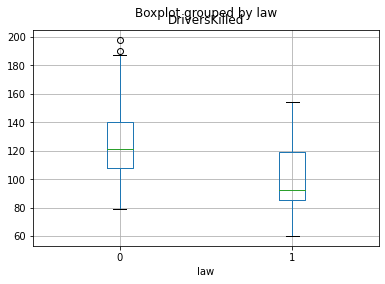

In [5]:
df.boxplot('DriversKilled',  'law')

In [6]:
df['FractionOfDriversKilled'] = df['DriversKilled']/ df['drivers']
df['FractionOfDriversKilled'].describe()

count    192.000000
mean       0.073422
std        0.007249
min        0.051107
25%        0.068414
50%        0.073224
75%        0.078098
max        0.091135
Name: FractionOfDriversKilled, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


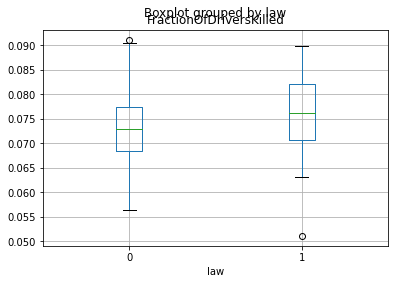

In [7]:
df.boxplot('FractionOfDriversKilled',  'law')

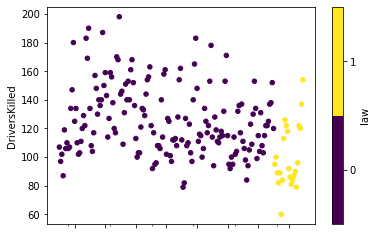

In [8]:
# Colormap scatterplot: 
df.plot.scatter(x = 'Date', y = 'DriversKilled', c = 'law', colormap = 'viridis')

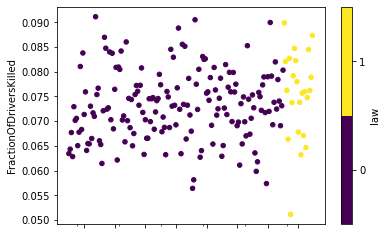

In [9]:
df.plot.scatter(x = 'Date', y = 'FractionOfDriversKilled', c = 'law', colormap = 'viridis')

In [10]:
df['Date'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                     192
unique                    192
top       1969-01-01 00:00:00
freq                        1
first     1969-01-01 00:00:00
last      1984-12-01 00:00:00
Name: Date, dtype: object

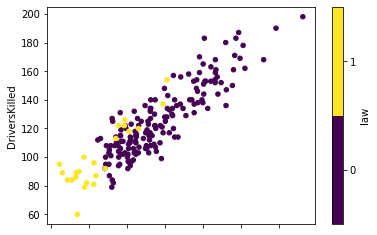

In [11]:
df.plot.scatter(x = 'drivers', y = 'DriversKilled', c = 'law', colormap = 'viridis')

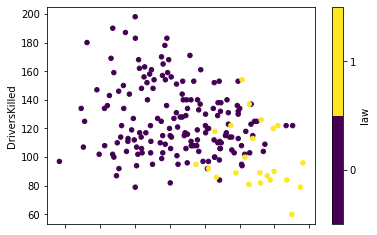

In [12]:
df.plot.scatter(x = 'kms', y = 'DriversKilled', c = 'law', colormap = 'viridis')

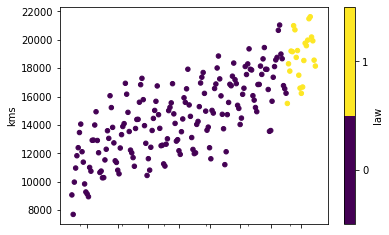

In [13]:
df.plot.scatter(x = 'Date', y = 'kms', c = 'law', colormap = 'viridis')

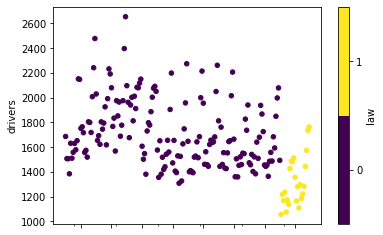

In [14]:
df.plot.scatter(x = 'Date', y = 'drivers', c = 'law', colormap = 'viridis')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


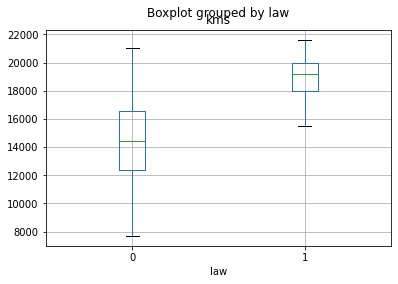

In [15]:
df.boxplot('kms',  'law')

In [16]:
df['law'].astype('category').value_counts()

0    169
1     23
Name: law, dtype: int64

In [17]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

X=df[['FractionOfDriversKilled', 'kms']]  # Features
y=df['law'].astype('category')  # Labels

myModel = LogisticRegression()
myModel.fit(X,y)

y_pred = myModel.predict([[0.1, 100]])[0]
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


0

In [18]:
y_pred = myModel.predict([[0.01, 100]])[0]
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


0

In [19]:
from sklearn.metrics import classification_report
y_pred_proba = myModel.predict_proba(X)[:,1]
y_pred = myModel.predict(X)

# cr = classification_report(y, y_pred>0.15)
cr = classification_report(y, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       169
           1       0.00      0.00      0.00        23

    accuracy                           0.88       192
   macro avg       0.44      0.50      0.47       192
weighted avg       0.77      0.88      0.82       192



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


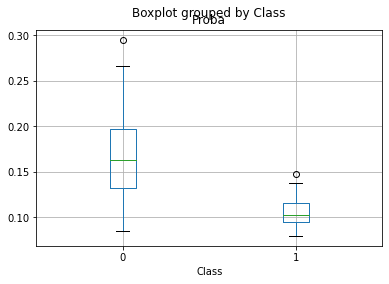

In [20]:
temp = pd.DataFrame({'Class': y, 'Proba': y_pred_proba})

temp.boxplot('Proba', 'Class')

In [21]:
cr = classification_report(y, 1-(y_pred_proba>(0.12)))
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       169
           1       0.45      0.78      0.57        23

    accuracy                           0.86       192
   macro avg       0.71      0.83      0.74       192
weighted avg       0.91      0.86      0.87       192

